In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import re
from tkinter import filedialog as fd
from tkinter import *

%matplotlib inline

In [2]:
def readStructureFactorValues(path):
    with open(path,'r') as F:
        Data = F.read()
    Data = Data.strip()
    FirstRow = Data.split(sep='\n')[0]
    ListOfRows = Data.split(sep='\n')[1:]
    if (len(ListOfRows) > 0):
        NumberOfColumns = len(ListOfRows[0].split()) - 1
    else:
        NumberOfColumns = 0
    AAStructureFactorList = []
    BBStructureFactorList = []
    ABStructureFactorList = []
    ConcentrationStructureFactorList = []
    kValueList = []
    for Row in ListOfRows:
        kValueList.append(Row.split()[0])
        AAStructureFactorList.append(Row.split()[1])
        BBStructureFactorList.append(Row.split()[2])
        ABStructureFactorList.append(Row.split()[3])
        ConcentrationStructureFactorList.append(Row.split()[4])
    return np.array(kValueList,dtype = float), np.array(AAStructureFactorList, dtype = float), np.array(BBStructureFactorList, dtype = float), np.array(ABStructureFactorList, dtype=float), np.array(ConcentrationStructureFactorList, dtype = float)

In [3]:
def readParticleConfig(path):
    with open(path,'r') as F:
        Data = F.read()
    Data = Data.strip()
    FirstRow = Data.split(sep='\n')[0]
    NumberOfAParticles = int(FirstRow.split()[6].strip('|'))
    NumberOfBParticles = int(FirstRow.split()[8].strip('|'))
    ListOfRows = Data.split(sep='\n')[1:]
    if (len(ListOfRows) > 0):
        NumberOfColumns = len(ListOfRows[0].split()) - 2 
    else:
        NumberOfColumns = 0
    APositions = np.empty((NumberOfAParticles, NumberOfColumns))
    BPositions = np.empty((NumberOfBParticles, NumberOfColumns))
    AIndex = 0
    BIndex = 0
    
    for i in range(len(ListOfRows)):
        if (ListOfRows[i].split()[NumberOfColumns + 1] == 'A'):
            for j in range(NumberOfColumns):
                APositions[AIndex,j] = ListOfRows[i].split()[j+1]
            AIndex += 1
        else:
            for j in range(NumberOfColumns):
                BPositions[BIndex,j] = ListOfRows[i].split()[j+1]
            BIndex += 1
    return APositions, BPositions

In [11]:
APositions, BPositions = readParticleConfig("/home/krummeich/Master-Thesis/Data_Analysis/data/FinalParticleConfig_N=1000_T=1.000000_AvgDens=0.600000_MCRuns=500000_epsAB=0.100000.dat")

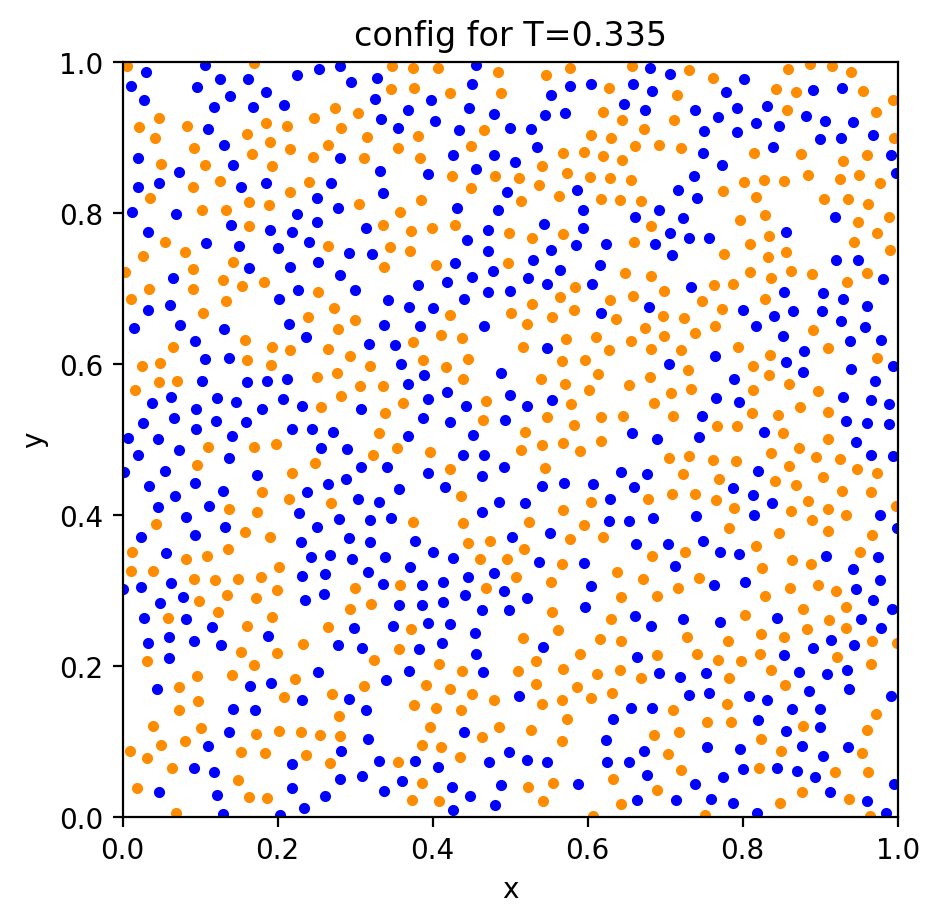

In [12]:
Fig, Host = plt.subplots(1,1,squeeze=False,figsize=(5,5),dpi =200)
Host[0,0].plot(APositions[:,0],APositions[:,1],'.',color='b')
Host[0,0].plot(BPositions[:,0],BPositions[:,1],'.',color='darkorange')
Host[0,0].set_xlabel('x')
Host[0,0].set_ylabel('y')
Host[0,0].set_xlim(0,1)
Host[0,0].set_ylim(0,1)
Host[0,0].set_title('config for T=0.335')
Fig.savefig('Particle_config'+'.png',format='png')

In [13]:
kValues, AAStruct, BBStruct, ABStruct, ConcStruct = readStructureFactorValues("/home/krummeich/Master-Thesis/Data_Analysis/data/structure_factor_T=1.0_Roh=0.6_epsAB=0.1.dat")

Text(0.5, 1.0, '$S_{AA}$')

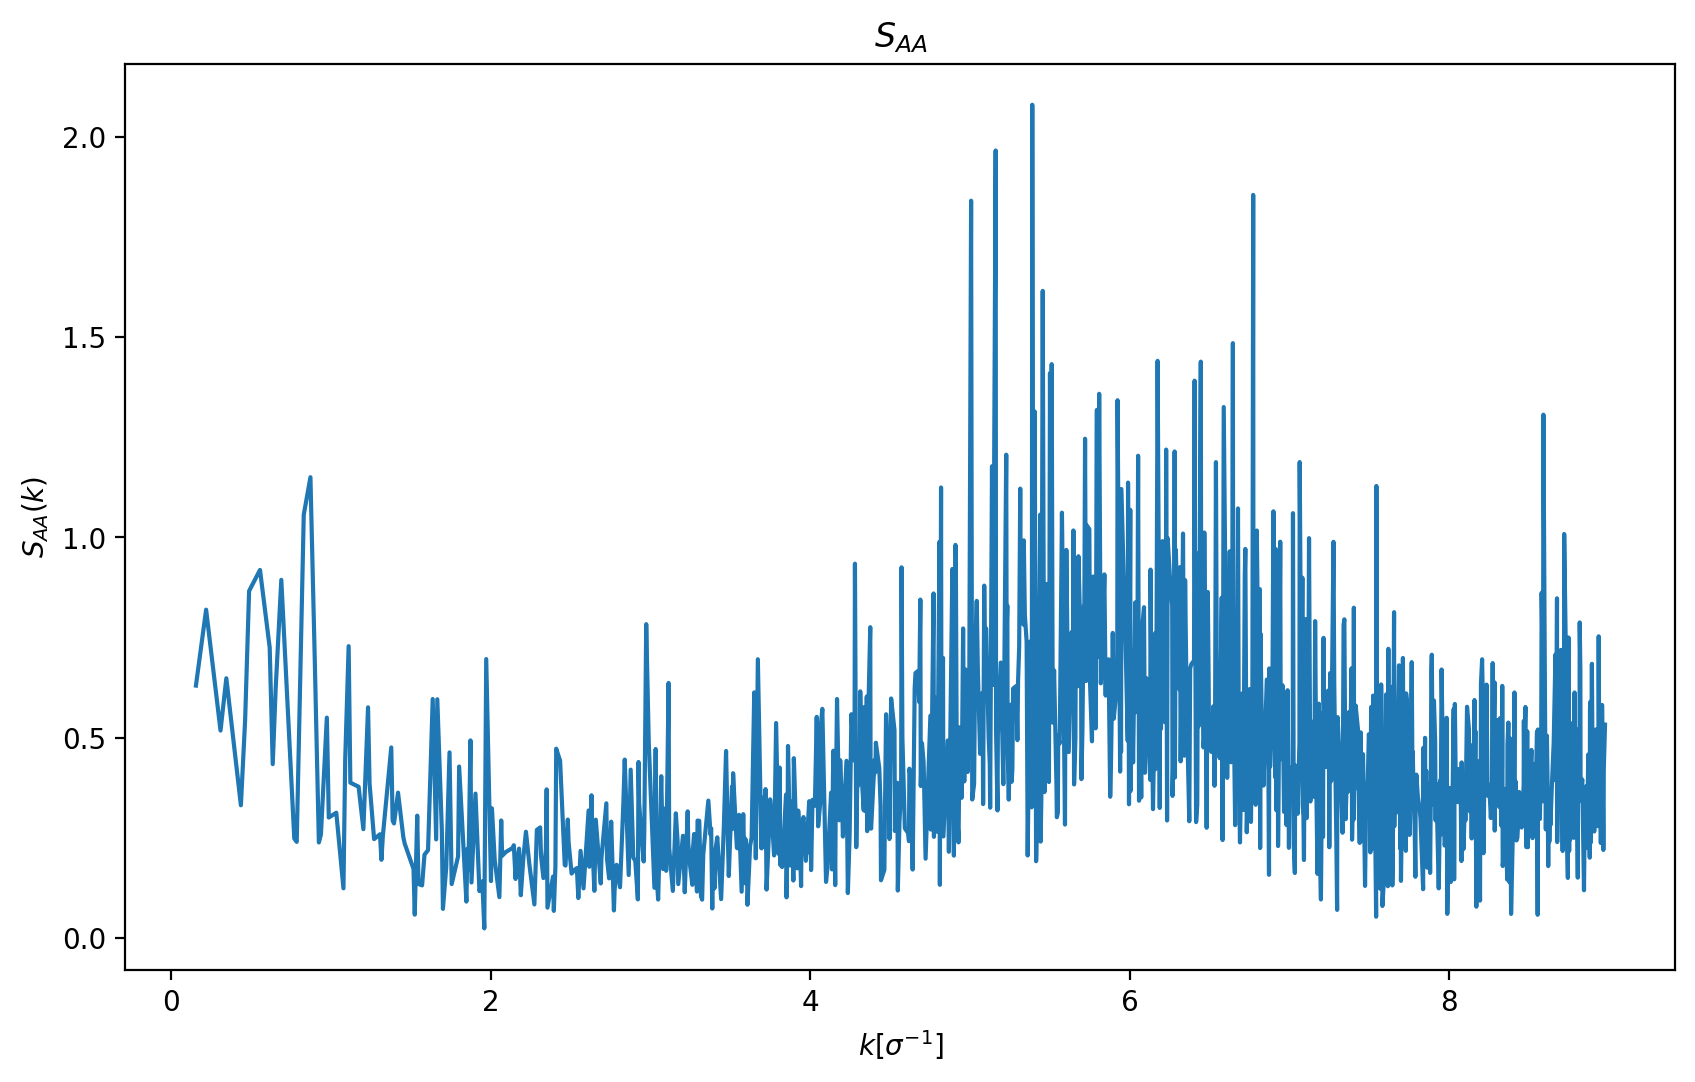

In [14]:
Fig, Ax = plt.subplots(1,1,squeeze=False, figsize=(10,6),dpi=200)
Ax[0,0].plot(kValues, AAStruct)
Ax[0,0].set_xlabel(r'$k[\sigma^{-1}]$')
Ax[0,0].set_ylabel('$S_{AA}(k)$')
Ax[0,0].set_title(r'$S_{AA}$')
#Fig.savefig('SAA'+'.png',format='png')

Text(0.5, 1.0, '$S_{BB}$')

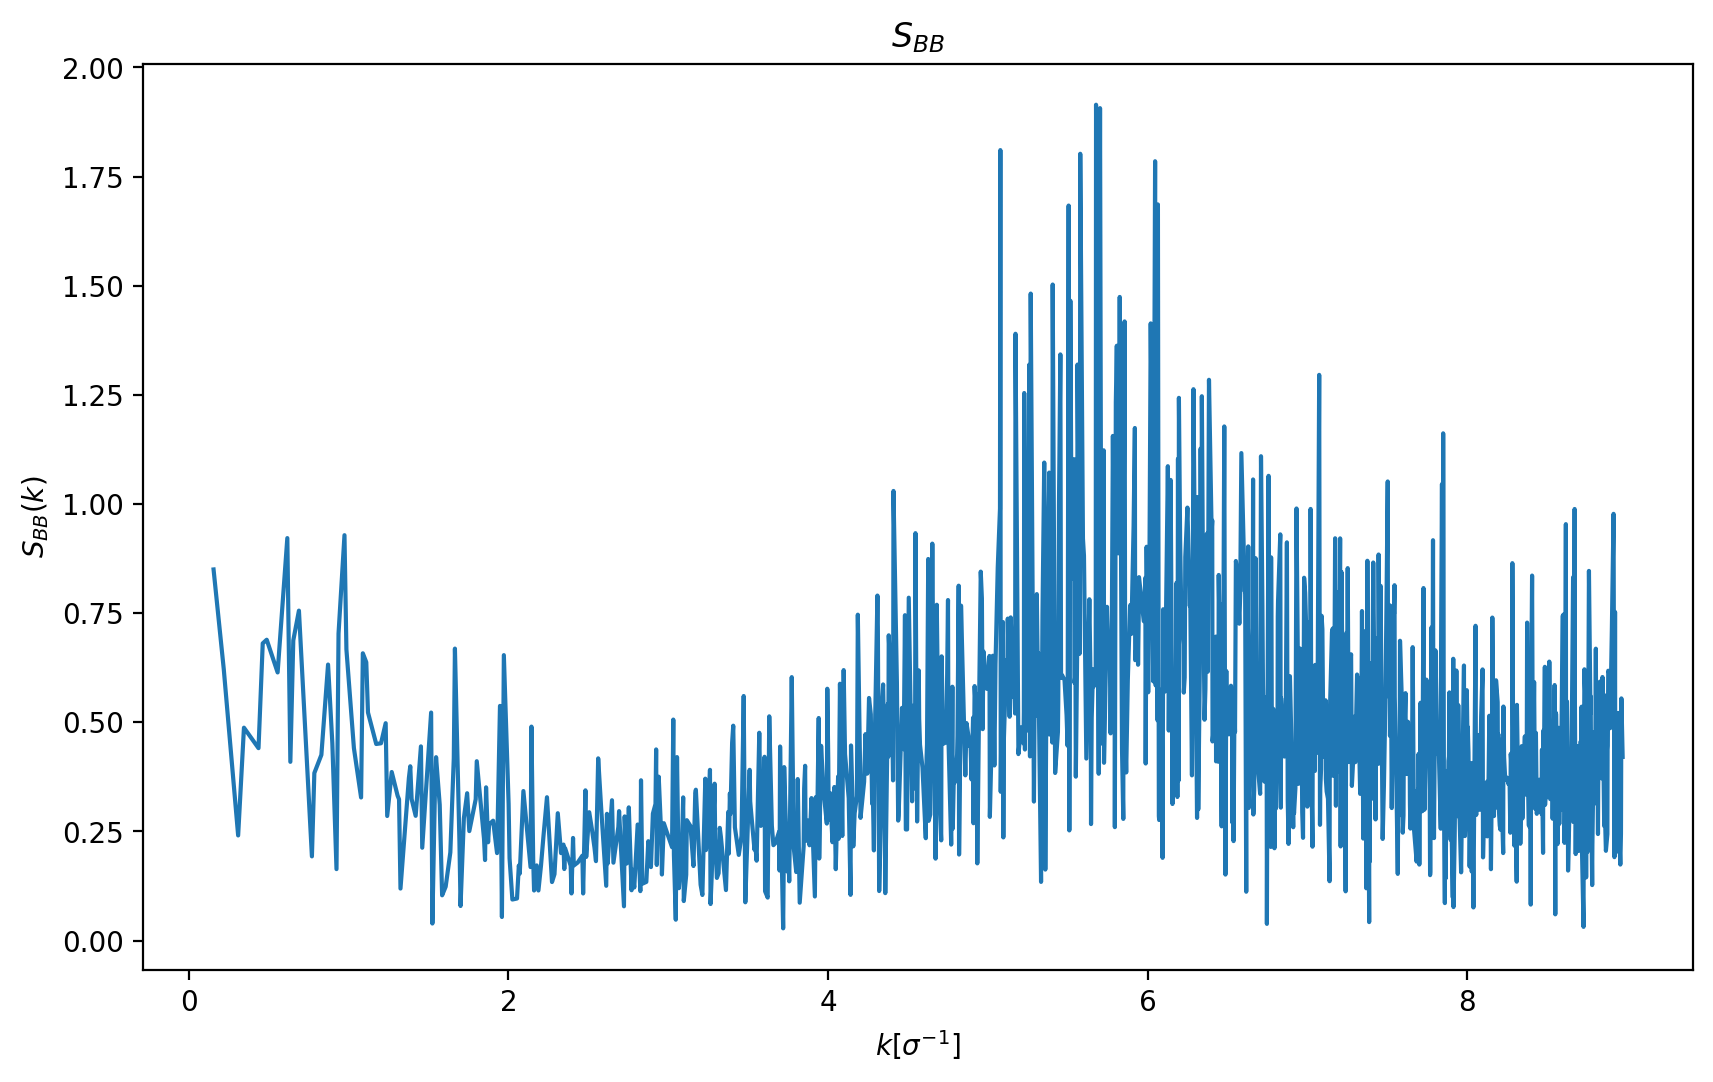

In [15]:
Fig, Ax = plt.subplots(1,1,squeeze=False, figsize=(10,6),dpi=200)
Ax[0,0].plot(kValues, BBStruct)
Ax[0,0].set_xlabel(r'$k[\sigma^{-1}]$')
Ax[0,0].set_ylabel('$S_{BB}(k)$')
Ax[0,0].set_title(r'$S_{BB}$')
#Fig.savefig('SBB'+'.png',format='png')

Text(0.5, 1.0, '$S_{AB}$')

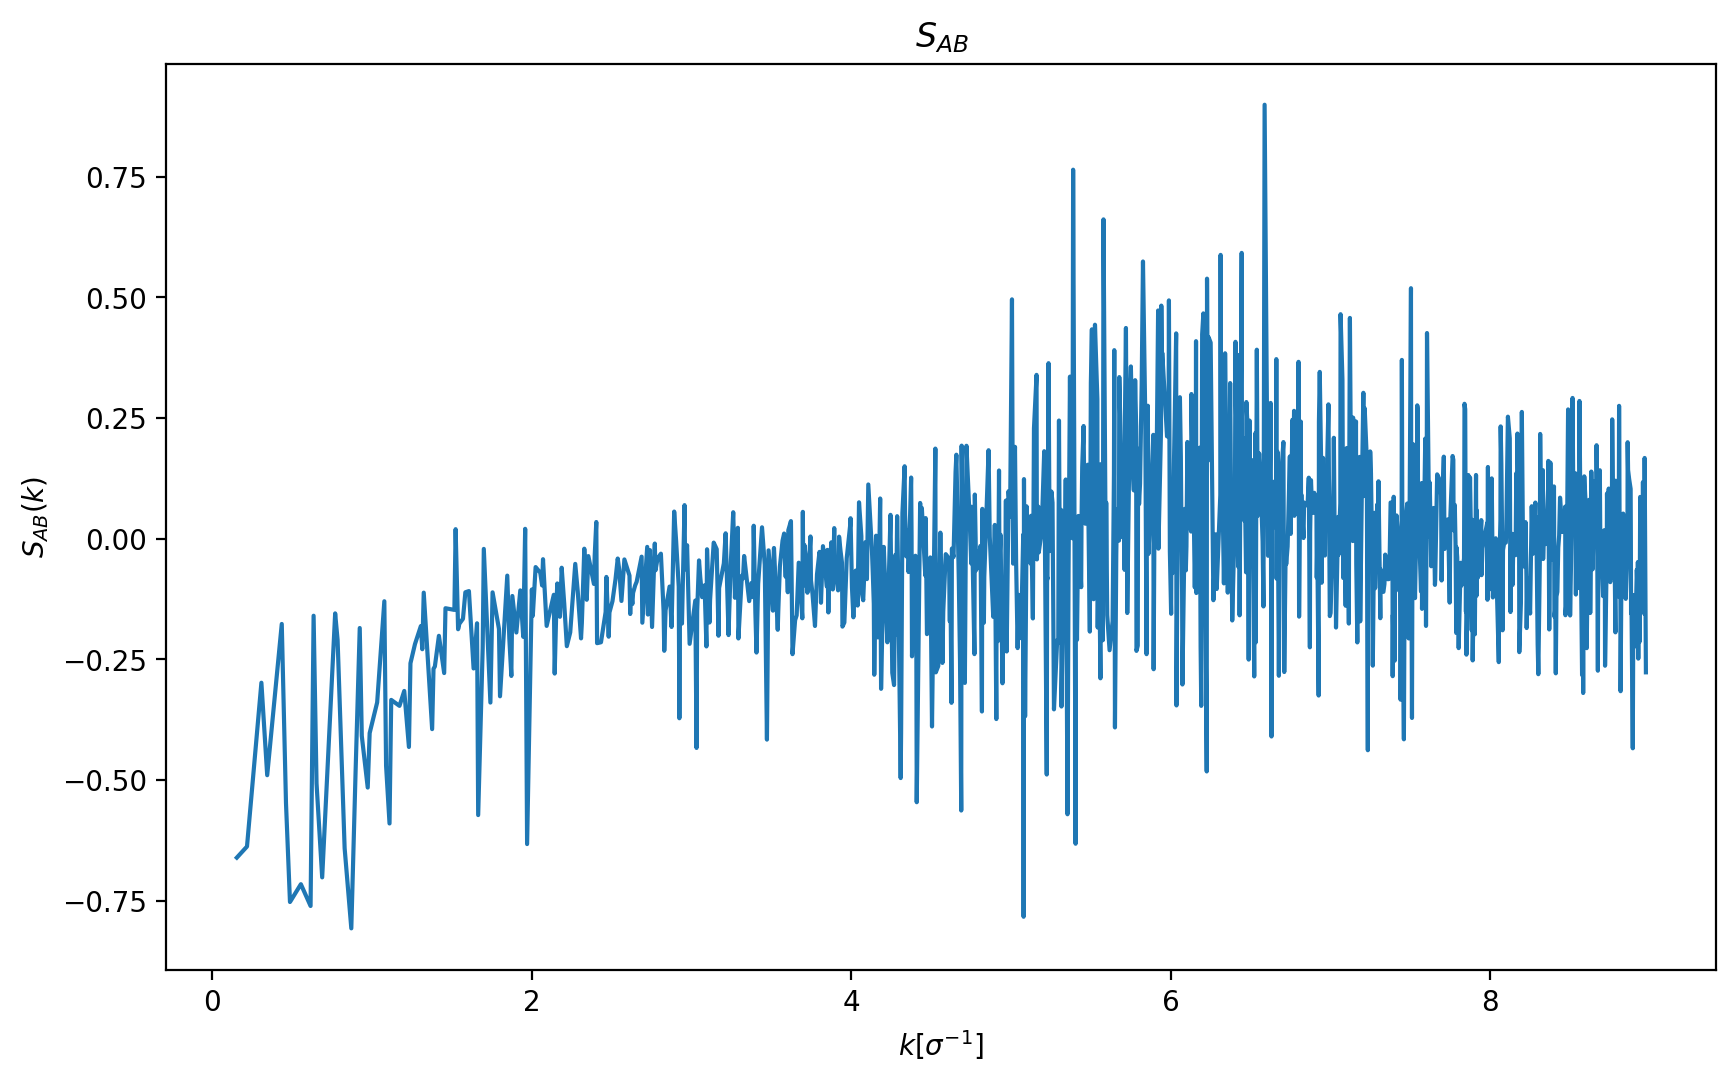

In [16]:
Fig, Ax = plt.subplots(1,1,squeeze=False, figsize=(10,6),dpi=200)
Ax[0,0].plot(kValues, ABStruct)
Ax[0,0].set_xlabel(r'$k[\sigma^{-1}]$')
Ax[0,0].set_ylabel('$S_{AB}(k)$')
Ax[0,0].set_title(r'$S_{AB}$')
#Fig.savefig('SAB'+'.png',format='png')

Text(0.5, 1.0, '$S_{cc}$')

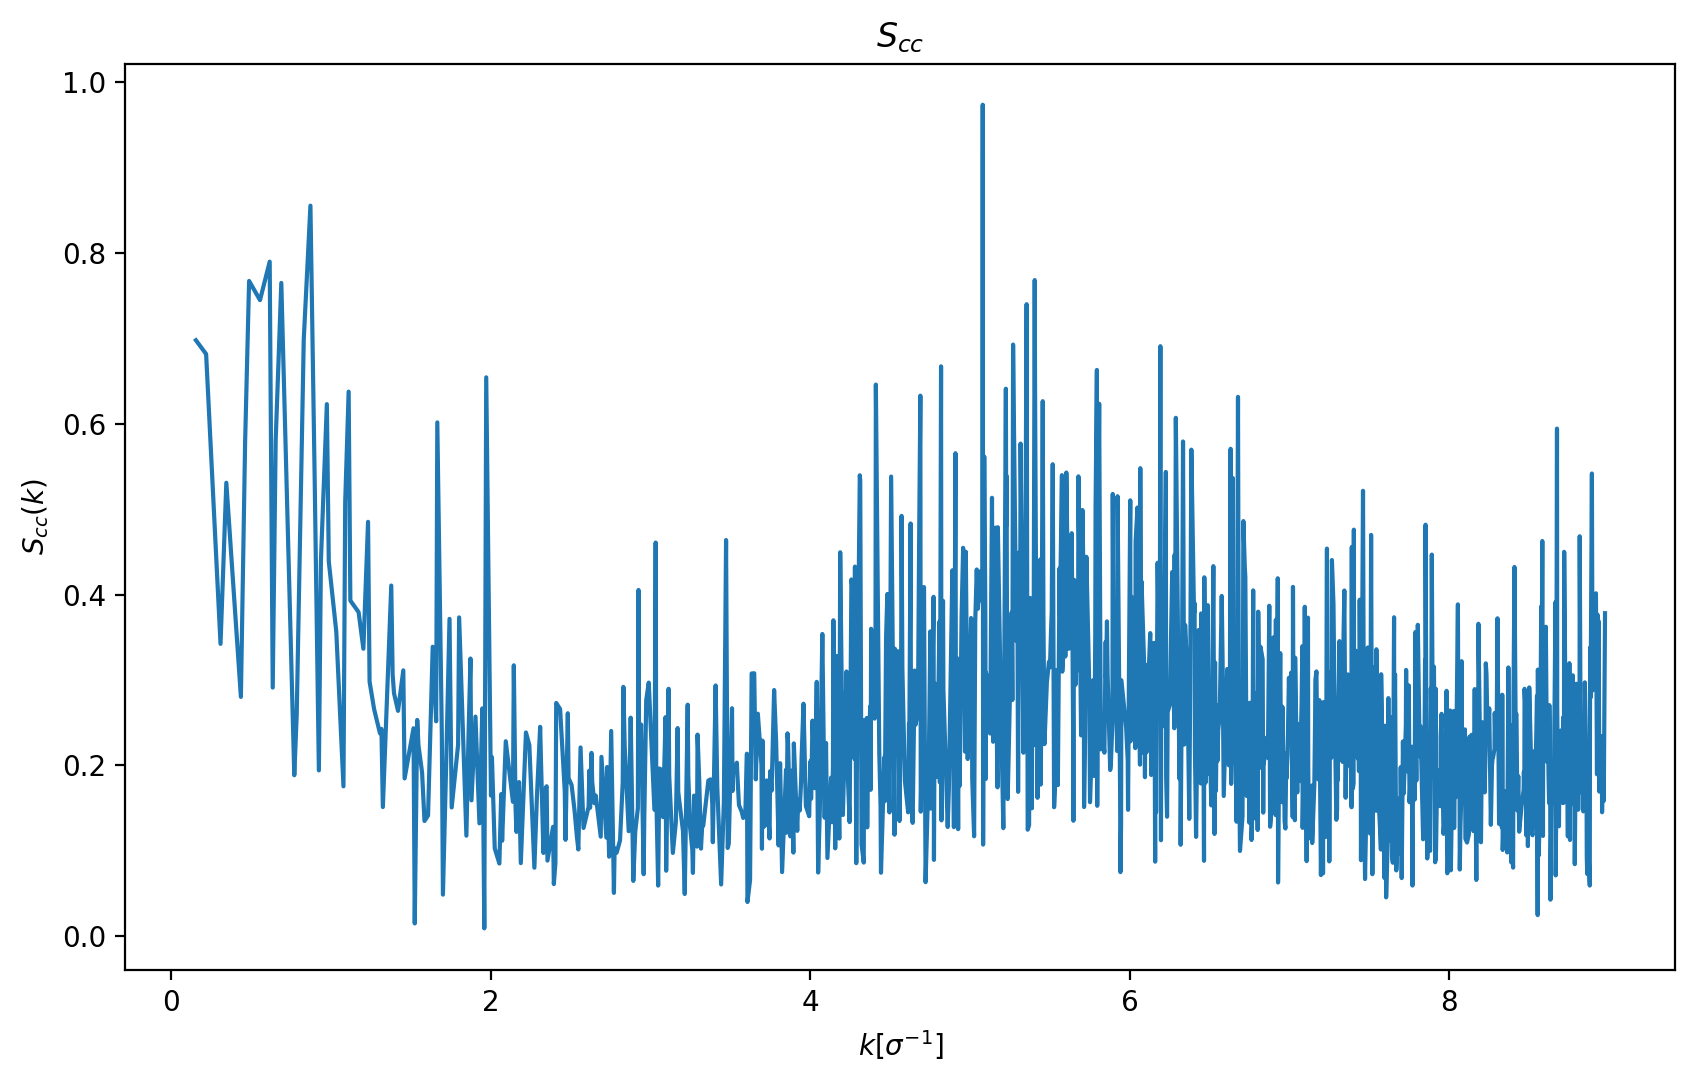

In [17]:
Fig, Ax = plt.subplots(1,1,squeeze=False, figsize=(10,6),dpi=200)
Ax[0,0].plot(kValues, ConcStruct)
Ax[0,0].set_xlabel(r'$k[\sigma^{-1}]$')
Ax[0,0].set_ylabel('$S_{cc}(k)$')
Ax[0,0].set_title(r'$S_{cc}$')
#Fig.savefig('Scc'+'.png',format='png')